In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier

In [42]:
!pip install tfIdfInheritVectorizer

In [84]:
# Load the dataset
data = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/LAB-EXAM/wine.csv"))
feature_names = ["class", "Alcohol", "Malicacid", "Ash", "Alcalinity_of_ash", "Magnesium", "Total_phenols", "Flavanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue",
                 "0D280_0D315_of_diluted_wines", "Proline"]
dframe = pd.DataFrame(data)

fname = dframe.columns

dframe.columns = feature_names

X = dframe.drop("class", axis=1)
y = dframe["class"]

dframe.head()

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       177 non-null    int64  
 1   14.23   177 non-null    float64
 2   1.71    177 non-null    float64
 3   2.43    177 non-null    float64
 4   15.6    177 non-null    float64
 5   127     177 non-null    int64  
 6   2.8     177 non-null    float64
 7   3.06    177 non-null    float64
 8   .28     177 non-null    float64
 9   2.29    177 non-null    float64
 10  5.64    177 non-null    float64
 11  1.04    177 non-null    float64
 12  3.92    177 non-null    float64
 13  1065    177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [88]:
feature = ["Alcohol", "Malicacid", "Ash", "Alcalinity_of_ash", "Magnesium", "Total_phenols", "Flavanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue",
                 "0D280_0D315_of_diluted_wines", "Proline"]

df = pd.DataFrame(X, columns=feature)

initial_rows, initial_cols = df.shape

null_values_count = df.isnull().sum().sum()
if null_values_count > 0:
    print(f"{null_values_count} of null values are found in the dataset.")
    df.dropna(inplace=True)
    print("Null values have been removed.")

'''duplicates_count = df.duplicated().sum()
if duplicates_count > 0:
    print(f"{duplicates_count} duplicate rows are found in the dataset.")
    df.drop_duplicates(inplace=True)
    print("Duplicate rows have been removed.")
'''
updated_rows, updated_cols = df.shape

print("\nDataset Information After Cleaning:")
print(df.info())

print("\nSummary of Statistics After Cleaning:")
print(df.describe())

print("\nCleaning Summary:")
print(f"Initial Dataset Size: {initial_rows} rows, {initial_cols} columns")
print(f"Updated Dataset Size: {updated_rows} rows, {updated_cols} columns")
print(f"Rows Removed: {initial_rows - updated_rows}")
print(f"Columns Removed: {initial_cols - updated_cols}")


Dataset Information After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       177 non-null    float64
 1   Malicacid                     177 non-null    float64
 2   Ash                           177 non-null    float64
 3   Alcalinity_of_ash             177 non-null    float64
 4   Magnesium                     177 non-null    int64  
 5   Total_phenols                 177 non-null    float64
 6   Flavanoids                    177 non-null    float64
 7   Nonflavanoid_phenols          177 non-null    float64
 8   Proanthocyanins               177 non-null    float64
 9   Color_intensity               177 non-null    float64
 10  Hue                           177 non-null    float64
 11  0D280_0D315_of_diluted_wines  177 non-null    float64
 12  Proline                    

In [89]:
initial_rows, initial_cols = df.shape

In [90]:
#CLEANED DATA
print("\nDataset Information After Cleaning:")
print(df.info())

print("\nCleaning Summary:")
print(f"Initial Dataset Size: {initial_rows} rows, {initial_cols} columns")
print(f"Updated Dataset Size: {updated_rows} rows, {updated_cols} columns")
print(f"Rows Removed: {initial_rows - updated_rows}")
print(f"Columns Removed: {initial_cols - updated_cols}")
print(data.describe())


Dataset Information After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       177 non-null    float64
 1   Malicacid                     177 non-null    float64
 2   Ash                           177 non-null    float64
 3   Alcalinity_of_ash             177 non-null    float64
 4   Magnesium                     177 non-null    int64  
 5   Total_phenols                 177 non-null    float64
 6   Flavanoids                    177 non-null    float64
 7   Nonflavanoid_phenols          177 non-null    float64
 8   Proanthocyanins               177 non-null    float64
 9   Color_intensity               177 non-null    float64
 10  Hue                           177 non-null    float64
 11  0D280_0D315_of_diluted_wines  177 non-null    float64
 12  Proline                    

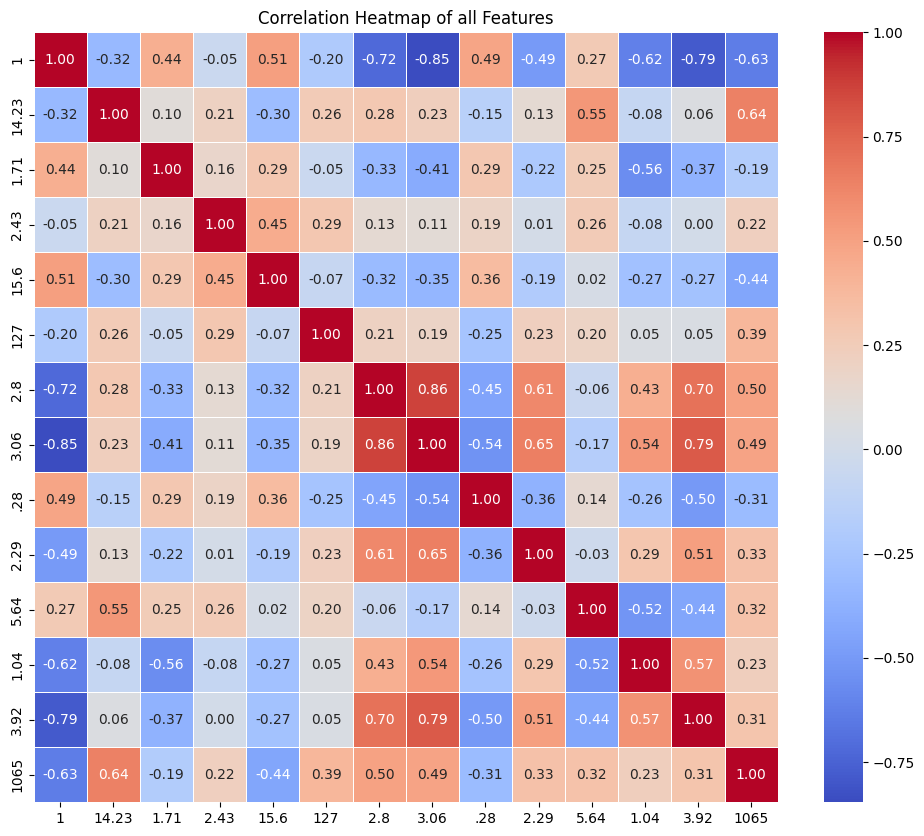


 Index(['class', 'Alcohol', 'Malicacid', 'Ash', 'Magnesium', 'Total_phenols',
       'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue'],
      dtype='object')


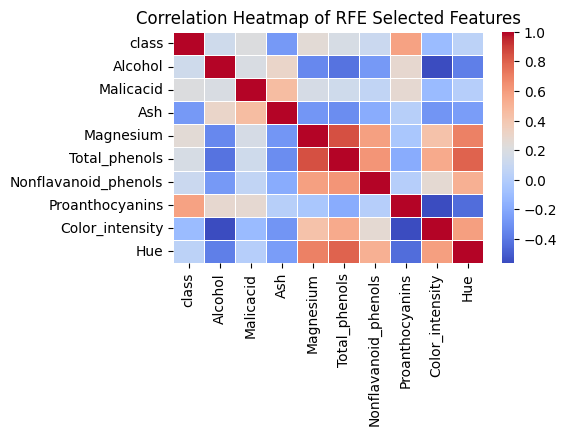

In [91]:
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=np.number)

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of all Features")
plt.show()

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create RFE object and specify the number of features to select
rfe = RFE(estimator=LogisticRegression(max_iter=10000), n_features_to_select=10)

# Fit RFE to training data (excluding the target variable)
rfe.fit(X_train, y_train)

# Transform the training and testing data to include only the selected features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Convert selected features to DataFrame
dframe_selected_features = pd.DataFrame(X_train_selected, columns=[feature_names[i] for i, selected in enumerate(rfe.support_) if selected])

print("\n", dframe_selected_features.columns)

# Calculate correlation matrix for selected features
correlation_matrix_selected = dframe_selected_features.corr()

# Plot correlation heatmap for selected features
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix_selected, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of RFE Selected Features')
plt.show()

In [92]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Bagging": BaggingClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}


In [ ]:
# Cross-validation with all features
results_all_features = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=10)
    results_all_features[name] = np.mean(scores)

# Print cross-validation scores before RFE
print("Cross-validation scores with all features:")
for name, score in results_all_features.items():
    print(f"{name}: {score*100:.2f}%")



Cross-validation scores with all features:
Logistic Regression: 96.67%
AdaBoost: 91.08%
Bagging: 93.86%
Decision Tree: 88.27%
Random Forest: 97.75%
SVM: 68.01%


                  Model  Accuracy      Feature Selection
0   Logistic Regression  0.966667           All Features
1              AdaBoost  0.910784           All Features
2               Bagging  0.938562           All Features
3         Decision Tree  0.882680           All Features
4         Random Forest  0.977451           All Features
5                   SVM  0.680065           All Features
6   Logistic Regression  0.966667  RFE Selected Features
7              AdaBoost  0.910784  RFE Selected Features
8               Bagging  0.938562  RFE Selected Features
9         Decision Tree  0.882680  RFE Selected Features
10        Random Forest  0.977451  RFE Selected Features
11                  SVM  0.680065  RFE Selected Features


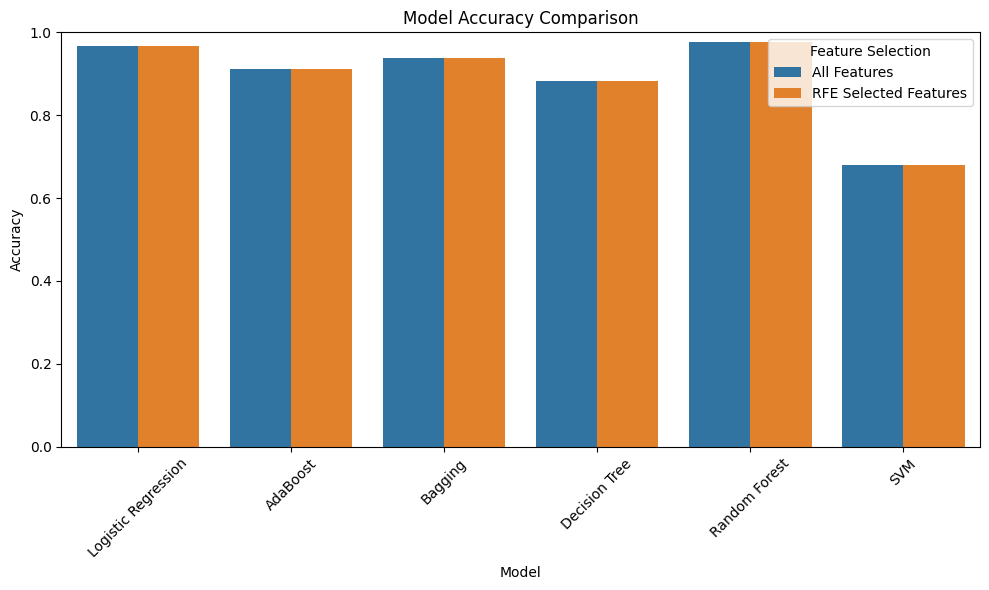

In [94]:
# Plotting
results_df = pd.DataFrame({
    "Model": list(results_all_features.keys()) + list(results_all_features.keys()),
    "Accuracy": list(results_all_features.values()) + list(results_all_features.values()),
    "Feature Selection": ['All Features'] * len(models) + ['RFE Selected Features'] * len(models)
})

print(results_df)


plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='Accuracy', hue='Feature Selection')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1.0)
plt.legend(title='Feature Selection')
plt.tight_layout()
plt.show()